## Heirarchical Clustering


### 1) Get the dataset

In [39]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) #Otherwise prints in scientific format

%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt


# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

### Probelm

A mall company wants to **group** its customers based on **Annual income** and **Spending score**

In [40]:
print("No. of datapoints : ", len(dataset))
dataset[:10]

No. of datapoints :  200


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### 2) Getting the variables into a numpy array 

Notice we do not have any dependent variables here. This classification is based on unlabelled data and hence this kind of learning is called **unsupervised learning** 

In [41]:
X = dataset.iloc[:,[3,4]].values 

### 3) Finding the optimal number of clusters using Dendrogram

In [42]:
import scipy.cluster.hierarchy as sch

**ward metric** used for merging clusters

$d(u,v) = \sqrt{\frac{|v|+|s|}
                               {T}d(v,s)^2
                        + \frac{|v|+|t|}
                               {T}d(v,t)^2
                        - \frac{|v|}
                               {T}d(s,t)^2}$

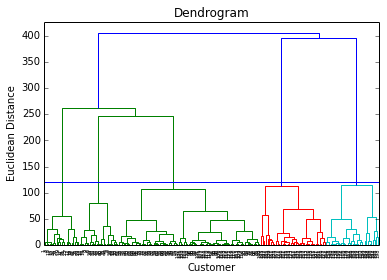

In [43]:
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
#plt.plot(range(0,len(X)),[120]*len(X))
plt.axhline(y=120)
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean Distance")
plt.show()

Cut through the largest line that does not cross any horizontal line. The number of vertical lines below this line is the number of clusters.

**Optimal number of clusters = 5**

### 4) Get the category of each data point

In [44]:
from sklearn.cluster import AgglomerativeClustering as AGC
help(AGC)

Help on class AgglomerativeClustering in module sklearn.cluster.hierarchical:

class AgglomerativeClustering(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int, default=2
 |      The number of clusters to find.
 |  
 |  affinity : string or callable, default: "euclidean"
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or 'precomputed'.
 |      If linkage is "ward", only "euclidean" is accepted.
 |  
 |  memory : None, str or object with the joblib.Memory interface, optional
 |      Used to cache the output of the computation of the tree.
 |      By default, no caching is done. If a string is given, it is the
 |      path to the caching directory.
 |  
 |  connectivity 

In [45]:
agc = AGC(n_clusters=5,affinity= 'euclidean', linkage='ward')
agc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x7f0f3c1ff378>)

In [46]:
category = agc.fit_predict(X)
pd.DataFrame(np.hstack((X,category.reshape(-1,1))),columns=["Income","Spending Score","Category"])[:10]

,Income,Spending Score,Category
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
5,17,76,3
6,18,6,4
7,18,94,3
8,19,3,4
9,19,72,3


### 5) Visualizing the cluster

Notice, this is not possible for higher dimensions

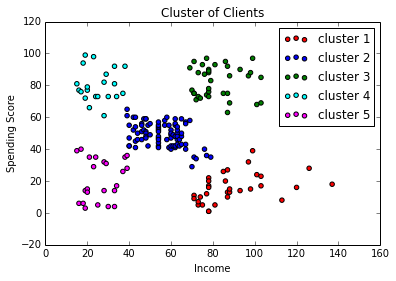

In [47]:
plt.scatter(X[category==0,0],X[category==0,1],c='red',label='cluster 1')
plt.scatter(X[category==1,0],X[category==1,1],c='blue',label='cluster 2')
plt.scatter(X[category==2,0],X[category==2,1],c='green',label='cluster 3')
plt.scatter(X[category==3,0],X[category==3,1],c='cyan',label='cluster 4')
plt.scatter(X[category==4,0],X[category==4,1],c='magenta',label='cluster 5')
#plt.scatter(agc.cluster_centers_[:,0],agc.cluster_centers_[:,1],s=100,c='yellow',label='Centroid')
plt.title("Cluster of Clients")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()